Tingkat Stres: 5.00


C:\Users\ahmad06\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


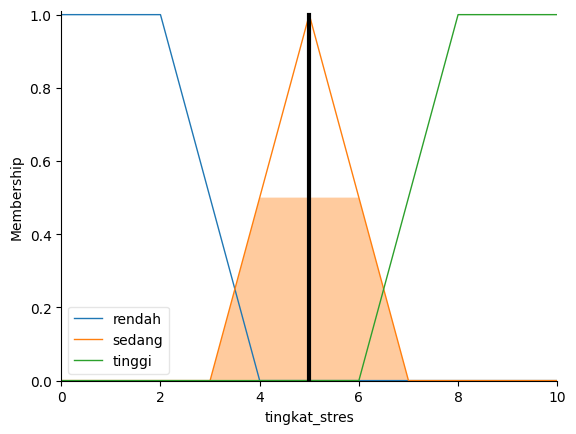

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define fuzzy variables
# Input variables
jumlah_tugas = ctrl.Antecedent(np.arange(0, 11, 1), 'jumlah_tugas')
waktu_belajar = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_belajar')
waktu_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_tidur')

# Output variable
tingkat_stres = ctrl.Consequent(np.arange(0, 11, 1), 'tingkat_stres')

# 2. Define membership functions
# For jumlah_tugas
jumlah_tugas['sedikit'] = fuzz.trapmf(jumlah_tugas.universe, [0, 0, 2, 4])
jumlah_tugas['sedang'] = fuzz.trimf(jumlah_tugas.universe, [2, 5, 8])
jumlah_tugas['banyak'] = fuzz.trapmf(jumlah_tugas.universe, [6, 8, 10, 10])

# For waktu_belajar
waktu_belajar['singkat'] = fuzz.trapmf(waktu_belajar.universe, [0, 0, 2, 4])
waktu_belajar['sedang'] = fuzz.trimf(waktu_belajar.universe, [2, 5, 8])
waktu_belajar['lama'] = fuzz.trapmf(waktu_belajar.universe, [6, 8, 10, 10])

# For waktu_tidur
waktu_tidur['kurang'] = fuzz.trapmf(waktu_tidur.universe, [0, 0, 3, 5])
waktu_tidur['cukup'] = fuzz.trimf(waktu_tidur.universe, [4, 6, 8])
waktu_tidur['berlebih'] = fuzz.trapmf(waktu_tidur.universe, [7, 9, 10, 10])

# For tingkat_stres
tingkat_stres['rendah'] = fuzz.trapmf(tingkat_stres.universe, [0, 0, 2, 4])
tingkat_stres['sedang'] = fuzz.trimf(tingkat_stres.universe, [3, 5, 7])
tingkat_stres['tinggi'] = fuzz.trapmf(tingkat_stres.universe, [6, 8, 10, 10])

# 3. Define fuzzy rules
rule1 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['singkat'] & waktu_tidur['cukup'], tingkat_stres['rendah'])
rule2 = ctrl.Rule(jumlah_tugas['sedang'] & waktu_belajar['sedang'] & waktu_tidur['cukup'], tingkat_stres['sedang'])
rule3 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['lama'] & waktu_tidur['kurang'], tingkat_stres['tinggi'])
rule4 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['sedang'] & waktu_tidur['cukup'], tingkat_stres['sedang'])
rule5 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['lama'] & waktu_tidur['berlebih'], tingkat_stres['rendah'])

# 4. Create control system
stres_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
stres_simulasi = ctrl.ControlSystemSimulation(stres_ctrl)

# 5. Input values for testing
stres_simulasi.input['jumlah_tugas'] = 7
stres_simulasi.input['waktu_belajar'] = 6
stres_simulasi.input['waktu_tidur'] = 5

# 6. Compute the result
stres_simulasi.compute()

# Output the result
print(f"Tingkat Stres: {stres_simulasi.output['tingkat_stres']:.2f}")

# Visualize the result
tingkat_stres.view(sim=stres_simulasi)